# Part I - Ford GoBike System Data Analysis
## by Akintola Malik Olasubomi

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data was last updated in 2019, as seen by the name "201902-fordgobike-tripdata.csv". I want to investigate the data and see what insights I can get from it. 


>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Load the dataset
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# check the head
bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# check the number of rows and columns
bike_df.shape

(183412, 16)

In [5]:
# check the info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# check the missing values to make sure they are NaN

#bike_df[bike_df.start_station_id.isnull()]
#bike_df[bike_df.start_station_name.isnull()]
#bike_df[bike_df.end_station_id.isnull()]
#bike_df[bike_df.end_station_name.isnull()]
#bike_df[bike_df.member_birth_year.isnull()]
bike_df[bike_df.member_gender.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [7]:
# check for duplicates
sum(bike_df.duplicated())

0

In [8]:
# check the summary of the quatitative data
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data Quality Issues

- **Columns : Issues**
- **start_time** : Incorrect datatype. Should be datetime format not string
- **end_time** : Incorrect datatype. Should be datetime format not string
- **start_station_id** : Incorrect datatype. Should be string format not float
- **end_station_id** : Incorrect datatype. Should be string format not float
- **bike_id** : Incorrect datatype. Should be string not integer.
- **member_birth_year** : Incorrect datatype. Should be string not float. (We would perform some operations where we would need to convert it to integer first).
- **member_birth_year** : The minimum vaue in the year column is **1878**, this is impossible as it would imply the person is **141**. This must be an incorrect data entry. During visual assessment using microsoft excel, I discovered there are people with birth years, 1920, 1910 and even below. I do not have any supporting data to check if correct hence I would take no action on this.
- Multiple null values that could affect my analysis.

In [9]:
# Create a new copy of the dataframe
bike_df_clean = bike_df.copy()

In [10]:
# drop rows with na values
bike_df_clean = bike_df_clean.dropna()

In [11]:
bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

**Define**<br>
I would change all the datatypes to the appropriate ones using astype() method.

**Code**

In [12]:
# Create dataframe of column and matching new datatype
new= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        'start_station_id': 'object',
        'end_station_id': 'object',
        'bike_id': 'object',
        'member_birth_year' : 'object'}

# Change datatype
bike_df_clean = bike_df_clean.astype(new)

**Test**

In [13]:
bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [14]:
bike_df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335
std,1642.204905,0.100391,0.117732,0.100295,0.117294
min,61.000000,37.317298,-122.453704,37.317298,-122.453704
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119


### What is the structure of your dataset?

> There are 183,412 rows and 16 columns in the dataset. There is no duplicates in the dataset

### What is/are the main feature(s) of interest in your dataset?

> I want to see if there is a particular trend with the duration used per trip and the time the trip took place. I also need to see what customer type are regular and the factors that determine this features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start_time, duration, member_year, and user_type columns would come in handy.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Distribution of the Duration in secs

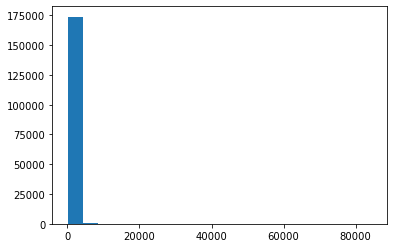

In [15]:
# Plot a histogram
plt.hist(data = bike_df_clean, x='duration_sec', bins = 20);

The distribution of the duration data is right skewed with a lot of outliers. I will show that better in the next few visualizations

In [16]:
bike_df_clean.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [17]:
np.log10(bike_df_clean.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

From the summary above, we can see that most of the records fall between 61s to 796s. Very high values are outliers and tend to skew the data. Now I will plot the data distribution on a log scale.

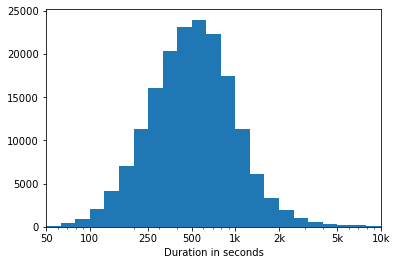

In [18]:
log_bin = 0.1
max_log = np.log10(bike_df_clean.duration_sec.max())
bins = 10 ** np.arange(0, max_log + log_bin, log_bin)

plt.hist(data = bike_df_clean, x='duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 250, 500, 1e3, 2e3, 5e3, 1e4], ['50', '100','250', '500', '1k', '2k', '5k', '10k'])
plt.xlim(50, 1e4)
plt.xlabel('Duration in seconds');

In [19]:
import datetime
 
# function to convert seconds to time    
def convert(n):
    return str(datetime.timedelta(seconds = n))

# convert seconds to time. Returns string of time
bike_df_clean['duration_time'] = bike_df_clean['duration_sec'].apply(convert)

# convert string of time to time format
bike_df_clean['duration_time'] = pd.to_datetime(bike_df_clean['duration_time'],format= '%H:%M:%S' ).dt.time

# extract duration in hours
bike_df_clean['duration_hour'] = pd.to_datetime(bike_df_clean['duration_time'],format= '%H:%M:%S' ).dt.hour

# Extract duration in minutes
bike_df_clean['duration_minute'] = bike_df_clean['duration_sec'].apply(lambda x : x // 60)

In [20]:
bike_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### Duration in minutes

(0.0, 200.0)

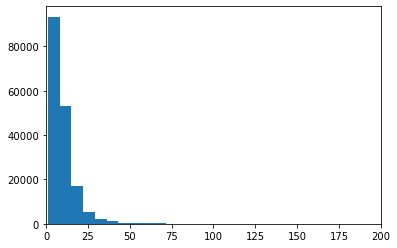

In [21]:
plt.hist(data=bike_df_clean, x = 'duration_minute', bins = 200)
plt.xlim(0,200)

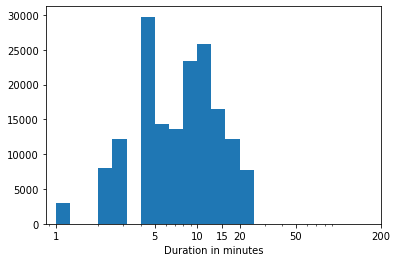

In [22]:
log_bin = 0.1
max_log = np.log10(bike_df_clean.duration_hour.max())
bins = 10 ** np.arange(0, max_log + log_bin, log_bin)

plt.hist(data = bike_df_clean, x='duration_minute', bins = bins)
plt.xscale('log')
plt.xticks([1, 5, 10, 15, 20, 50, 200], ['1', '5', '10', '15', '20', '50', '200'])
#plt.xlim(1, 25)
plt.xlabel('Duration in minutes');

### Most common Trip time

In [23]:
# create hour column 
bike_df_clean['hour'] = bike_df_clean['start_time'].dt.hour


def time_period(hour):
    """" fuction to segregate the time period """
    if 0 <= hour < 5:
        return ('Midnight')
    elif 5 <= hour < 9:
        return ('Early Morning')
    elif 9 <= hour < 12:
        return ('Morning')
    elif 12 <= hour < 17:
        return ('Afternoon')
    elif 17 <= hour < 20:
        return ('Evening')
    elif 20 <= hour <= 23:
        return ('Night')
    
    
# Create period column
bike_df_clean['period'] = bike_df_clean.hour.apply(time_period)

In [24]:
# order the period column
periods = ['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = periods)
bike_df_clean['period'] = bike_df_clean['period'].astype(ordered)

Text(0.5, 0, 'Time Period')

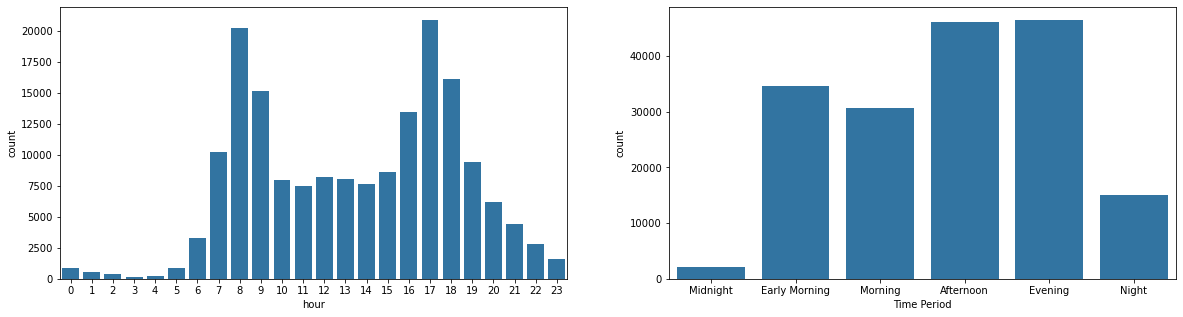

In [25]:
# create a figure
plt.figure(figsize = [20,5])

# create order for the hour. arange won't include the last number
h_order = np.arange(0, 24)

# create base color
base_color = sns.color_palette()[0]

# create first subplot. A barchart showing the frequency of the hours
plt.subplot(1,2,1)
sns.countplot(data=bike_df_clean, x = 'hour', order = h_order, color = base_color)
plt.xlabel('hour')


# create second subplot. A barchart showing the frequency of the periods
plt.subplot(1,2,2)
sns.countplot(data=bike_df_clean, x = 'period', color = base_color)
plt.xlabel('Time Period')

In [26]:
bike_df_clean.period.value_counts()

Evening          46446
Afternoon        46114
Early Morning    34617
Morning          30635
Night            14976
Midnight          2164
Name: period, dtype: int64

<a id='day'></a>
### Day of week 

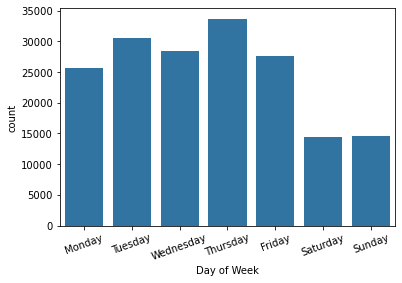

In [27]:
# create day column 
bike_df_clean['day'] = bike_df_clean['start_time'].dt.day_name()

# order the day column
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = days)
bike_df_clean['day'] = bike_df_clean['day'].astype(ordered)

# BAr chart for days
sns.countplot(data=bike_df_clean, x = 'day', color = base_color);
plt.xlabel('Day of Week');
plt.xticks(rotation = 20);



### Month

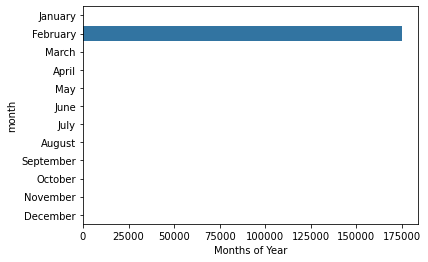

In [28]:
# create month column 
bike_df_clean['month'] = bike_df_clean['start_time'].dt.month_name()

# order the month column
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = months)
bike_df_clean['month'] = bike_df_clean['month'].astype(ordered)

# Bar chart for months
sns.countplot(data=bike_df_clean, y = 'month', color = base_color);
plt.xlabel('Months of Year');

In [29]:
bike_df_clean.month.value_counts()

February     174952
January           0
March             0
April             0
May               0
June              0
July              0
August            0
September         0
October           0
November          0
December          0
Name: month, dtype: int64

The data is only for the month of February

### Member Birth Year and Age

In [30]:
bike_df_clean.member_birth_year.value_counts().nlargest(10)

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
1992.0     8245
1987.0     8010
1986.0     7953
1994.0     7654
1995.0     7420
Name: member_birth_year, dtype: int64

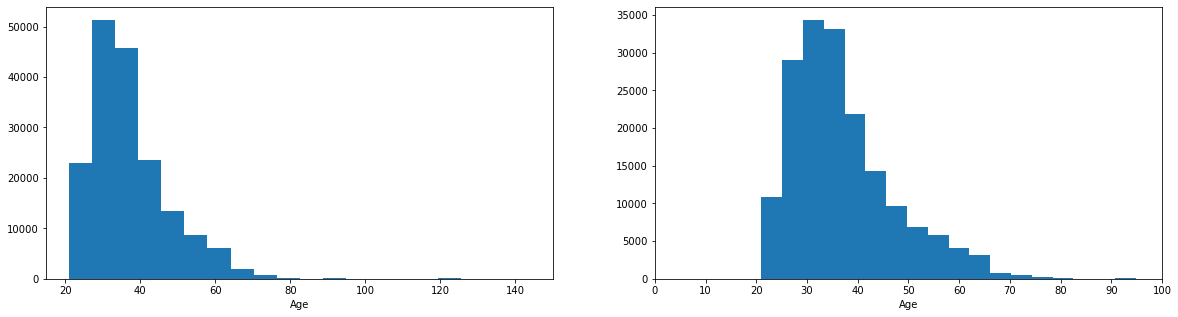

In [33]:
# extract age from birth year
bike_df_clean['member_age'] = bike_df_clean['member_birth_year'].apply(lambda x : 2022 - int(x))

# plot age distribution
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.hist(data = bike_df_clean, x = 'member_age', bins = 20)
plt.xlabel('Age')


plt.subplot(1,2,2)
plt.hist(data = bike_df_clean, x = 'member_age', bins = 30);
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100'])
plt.xlim(0,100);
plt.xlabel('Age');

> The distribution is skewed to the right with some outliers. The most populated age group is between 20-40. This represents a young generation and they are still agile and fit to ride bikes.

### Member Gender

In [448]:

def cat_plot(column):
    """ function to plot attributes with not more than three categories """
    # Create figure
    plt.figure(figsize=[20,5])

    # sort values
    arranged = bike_df_clean[column].value_counts()

    # plot pie chart on first subplot
    plt.subplot(1,2,1)
    plt.pie(arranged, labels = arranged.index, startangle = 90,
            counterclock = False, autopct='%1.2f%%');
    plt.axis('square')
    plt.title(column + ' Comparison', fontsize=15);

    
    
    # order the column and get the index
    orders = bike_df_clean[column].value_counts().index
    
    #set the colors, using pie chart shouldn't be for more that three atrributes, hence I will set only three colors
    color1 = sns.color_palette()[0]
    color2 = sns.color_palette()[1]
    color3 = sns.color_palette()[2]
    
    # plot bar chart on second subplot
    plt.subplot(1,2,2)
    sns.countplot(data = bike_df_clean, x = column, order = orders, palette = [color1, color2, color3]);

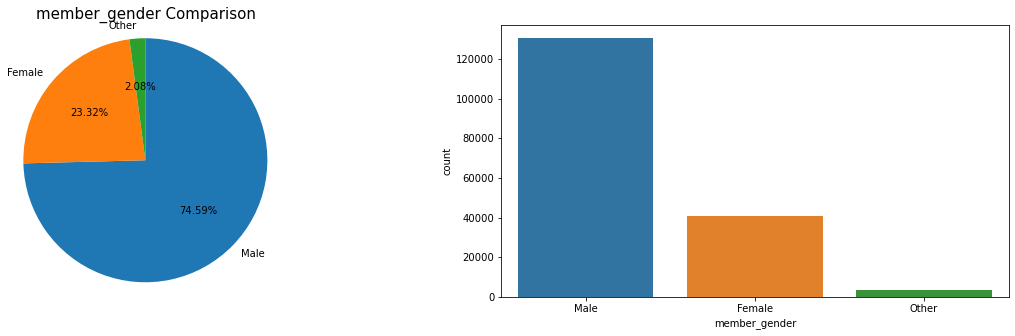

In [431]:
# plot for member gender
cat_plot('member_gender')

> Most of the users are Male and they take up more than 70% of the total records. The are more than two times the populatio of the female

<a id='user'></a>
### User type

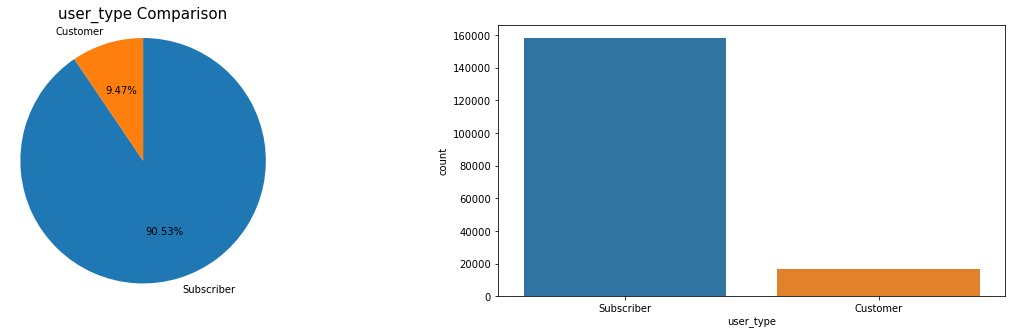

In [432]:
cat_plot('user_type')



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Start time of ride was not really suprising. It peaked at 8am and 5pm and I would believe this is due to the rush hour for people going to and returning from work respectively.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created a column for the duration in minutes. People tend to relate easily well with minutes, and this will make my exploration easier to understand.

> The Duration was overly skewed and I had to perform a log transformation on it in order to have a normal like distribution view of it

> From the member_birth_year column, I was able to create a new column for the member ages, in order to perform some operations and unerstand the data better.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

I will be exploring the start time of ride and the duration of ride against other variables to see if thie attributes are dependent attributes on the rest.

### Duration and gender
**Does gender affect the duration of ride?**

I have one numerical data against a categorial data, so I will be using first a boxplot to see the statistics of each category.

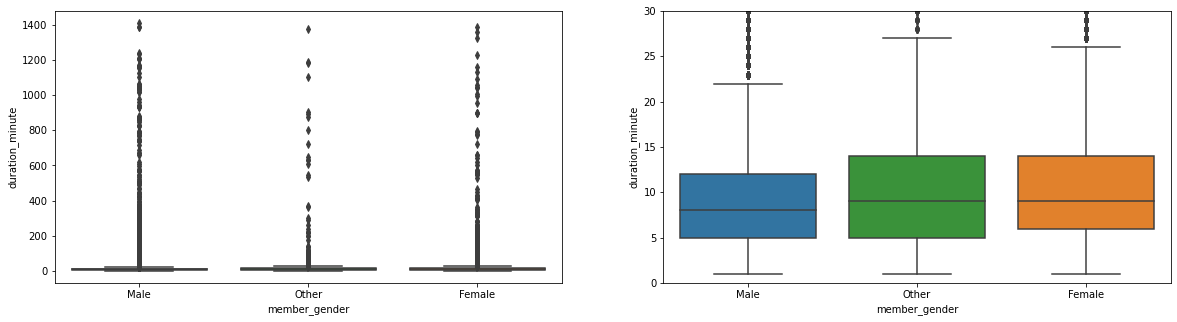

In [433]:
# plot boxplox
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
sns.boxplot(data = bike_df_clean, x = 'member_gender', y = 'duration_minute', palette = [color1, color3, color2]);

color1 = sns.color_palette()[0]
color2 = sns.color_palette()[1]
color3 = sns.color_palette()[2]

# A clearer view
plt.subplot(1,2,2)
sns.boxplot(data = bike_df_clean, x = 'member_gender', y = 'duration_minute', palette = [color1, color3, color2])
plt.ylim(0, 30);

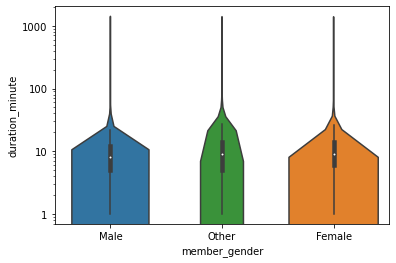

In [434]:
sns.violinplot(data = bike_df_clean, x = 'member_gender', y = 'duration_minute', palette = [color1, color3, color2])
plt.yscale('log')
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000']);

<AxesSubplot:xlabel='member_gender', ylabel='duration_minute'>

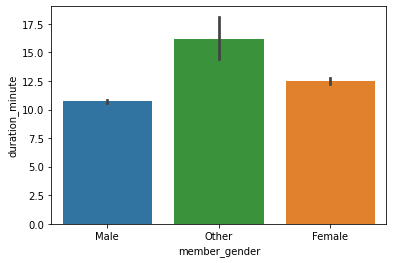

In [435]:
sns.barplot(data = bike_df_clean, x = 'member_gender', y = 'duration_minute', palette = [color1, color3, color2])

> Even though it seems other have a better statistic than male and female, we can see that the male category has more outliers and this shows that they majorly have a higher ride time span than the remaining two. The 'other' category has fewer records and this could be the cause of its seemingly okay statistics.

### Duration and Age

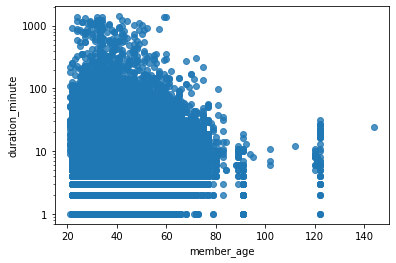

In [437]:
sns.regplot(data = bike_df_clean, x = 'member_age', y = 'duration_minute', fit_reg = False)
plt.yscale('log')
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000']);

> There appears to be a negative correlation as the duration time appears to reduce as the age increases.

### Duration and Day

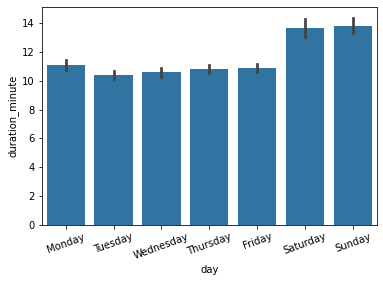

In [438]:
sns.barplot(data = bike_df_clean, x = 'day', y = 'duration_minute', color = sns.color_palette()[0])
plt.xticks(rotation = 20);

> From the [countplot of the days](#day) shown in my Univariate exploration, we can see that the weekdays account for a greater part of the bike rides taken. The least number of bike rides were taken on saturdays and Sundays. But from this barchart, we can see clearly that even though the number of bike rides were minimum, they were actually longer in those days than the rest of the days. 
> Also, the average duration for the weekdays are almost equal signifying that people most likely ride for the same purpose (to work) during the week days, and probably for leisure at weekends.

### Duration and user type

<AxesSubplot:xlabel='user_type', ylabel='duration_minute'>

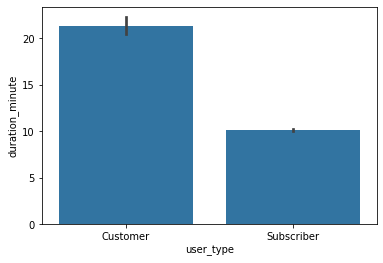

In [439]:
#plot average duration by user_type
sns.barplot(data = bike_df_clean, x = 'user_type', y = 'duration_minute', color = sns.color_palette()[0])

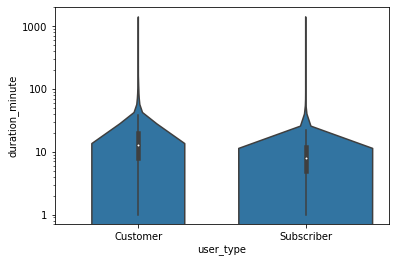

In [442]:
sns.violinplot(data = bike_df_clean, x = 'user_type', y = 'duration_minute', color = sns.color_palette()[0])
plt.yscale('log')
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000']);

> From the [countplot of the user type](#user) shown in my Univariate exploration and even the violin chart above, even though, we have far more rides by subscribers, they do not spend as much time as a customer would.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Gender and age almost do not have any effect on the duration of ride.
> For the user_type, it shows that the amount of rides in their respective categories does not affect the duration of the rides. 
> More trips are taken during the weekdays than at weekends. Saturdays and Sundays have the lowest number of trips. People might prefer to take a bike ride to work during the weekdays and ride their personal vehicles at weekends. But the weekends rides are averagely longer than the weekdays ride. People tend to ride longer when it is for leisure 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Weekdays, even though have the highest number of rides, have a levelled average duration and lesser than the rides during the weekends.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

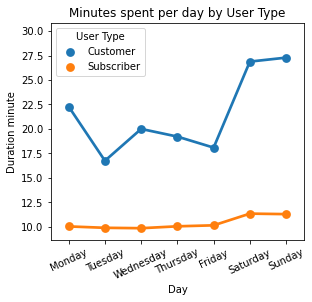

In [444]:
plt.figure(figsize=[10, 4])

# Duration by Day categorized by user type
plt.subplot(1, 2, 1)
sns.pointplot(data=bike_df_clean, x='day', y='duration_minute', hue='user_type', errwidth=0)
plt.xlabel('Day')
plt.ylabel('Duration minute')
plt.xticks(rotation = 25)
plt.title('Minutes spent per day by User Type')
plt.legend(title='User Type')

>The time of ride for the subscribers is stable and does not really vary from day to day. But we can see from the chart that the customers time of ride varies with its peak on Sunday and the minimum on Tuesday

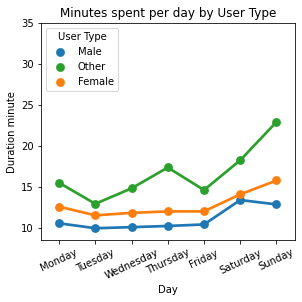

In [445]:
color1 = sns.color_palette()[0]
color2 = sns.color_palette()[1]
color3 = sns.color_palette()[2]



plt.figure(figsize=[10, 4])

# Duration by Day categorized by user type
plt.subplot(1, 2, 1)
sns.pointplot(data=bike_df_clean, x='day', y='duration_minute', hue='member_gender', errwidth=0, palette = [color1, color3, color2])
plt.xlabel('Day')
plt.ylabel('Duration minute')
plt.xticks(rotation = 25)
plt.title('Minutes spent per day by User Type')
plt.legend(title='User Type')

>The 'Other' gender ride longer on aerage than the remaining two genders. We can see a continuous increase in the time of ride for female through out the week and even on sunday where the time of ride for the male is dropped.

<AxesSubplot:xlabel='user_type', ylabel='duration_minute'>

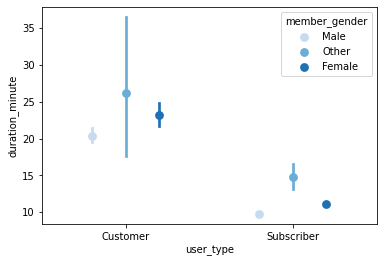

In [446]:
sns.pointplot(data = bike_df_clean, x ='user_type', y = 'duration_minute', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The minutes spent per day by user type, shows clearly that the jump in duration of ride between the weekends and weekdays does not pertain to only one user type, it cuts across the three.

### Were there any interesting or surprising interactions between features?

> Yes, I noticed the duration of ride for subscribers is almost leveled across the days while that of customers vary.

## Conclusions
> I think it is now safe to say that the Subscribers have a limit to the amount of time they can spend per ride. The time of ride for the Subscribers hardly varies from day to day and they might have to stick to a particular purpose of ride. 

> Customers on the other hand are at ease of time. They might not have time limit, and if they do, it won't be as less as the Subscribers'. Their time f ride varies from day to da, telling us that every one of them is able to ride at his own pleasure and dicretion of time.

>Both the Subscribers and Customers ride more on Saturdays and Sundays, telling us that the increase in duration of ride on these days is not exclusive to one party. 

> Stamina and strength might not be a factor to determining trip duration, as we can see that even Female tend to ride longer on the average than the male counterparts. This follows accordingly in the duration by user_type and gender chart.
.


In [351]:
bike_df_clean.to_csv('Ford_Gobike_clean.csv')

## References

https://stackoverflow.com/questions/37801321/python-pandas-convert-string-to-time-only <br>
https://www.geeksforgeeks.org/python-convert-string-to-datetime-and-vice-versa/ <br>
https://www.geeksforgeeks.org/python-program-to-convert-seconds-into-hours-minutes-and-seconds/ <br>
https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer <br>
